https://www.kaggle.com/datasets/stefanoleone992/fifa-22-complete-player-dataset

    

In [2]:
import pandas as pd
import numpy as np

In [3]:
players = pd.read_csv("/home/saurav/Downloads/archive (1)/players_22.csv")

/tmp/ipykernel_50609/1267499207.py:1: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  players = pd.read_csv("/home/saurav/Downloads/archive (1)/players_22.csv")


In [4]:
players.head()

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png


In [5]:
features = ["overall", "potential", "wage_eur", "value_eur", "age"]

In [6]:
players = players.dropna(subset=features) #drop all the na values in the row as well as all the feature column

In [7]:
data = players[features].copy()
data

,overall,potential,wage_eur,value_eur,age
0,93,93,320000.0,78000000.0,34
1,92,92,270000.0,119500000.0,32
2,91,91,270000.0,45000000.0,36
3,91,91,270000.0,129000000.0,29
4,91,91,350000.0,125500000.0,30
...,...,...,...,...,...
19234,47,52,1000.0,70000.0,22
19235,47,59,500.0,110000.0,19
19236,47,55,500.0,100000.0,21
19237,47,60,500.0,110000.0,19


Scale data to standardize values

In [10]:
data = ((data - data.min()) / (data.max() - data.min())) * 9 + 1

In [11]:
data.describe()

,overall,potential,wage_eur,value_eur,age
count,19165.000000,19165.000000,19165.000000,19165.000000,19165.000000
mean,4.670472,5.319998,1.219443,1.131826,4.063345
std,1.346635,1.191076,0.501528,0.353229,1.575838
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.739130,4.521739,1.012876,1.021620,2.666667
50%,4.717391,5.304348,1.064378,1.044817,4.000000
75%,5.500000,6.086957,1.193133,1.092370,5.333333
max,10.000000,10.000000,10.000000,10.000000,10.000000


In [12]:
data.head()

,overall,potential,wage_eur,value_eur,age
0,10.000000,9.608696,9.227468,4.618307,7.000000
1,9.804348,9.413043,7.939914,6.543654,6.333333
2,9.608696,9.217391,7.939914,3.087308,7.666667
3,9.608696,9.217391,7.939914,6.984396,5.333333
4,9.608696,9.217391,10.000000,6.822018,5.666667


Initialize random centroids

In [18]:
centroid = data.apply(lambda x: float(x.sample()))
centroid

overall      2.369565
potential    5.108696
wage_eur     1.605150
value_eur    1.064534
age          2.333333
dtype: float64

In [19]:
def random_centroids(data, k):
    centroids = []
    for i in range(k):
        centroid = data.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids, axis=1)

In [20]:
centroids = random_centroids(data, 5)
centroids

,0,1,2,3,4
overall,4.717391,4.717391,5.500000,2.173913,8.630435
potential,5.500000,6.086957,4.717391,4.130435,3.543478
wage_eur,1.270386,1.502146,3.072961,1.002575,1.476395
value_eur,1.035538,1.006078,1.013501,1.032058,1.012341
age,3.000000,4.333333,5.333333,3.666667,3.000000


Get labels for each data point

In [25]:
distances = centroids.apply(lambda x: np.sqrt(((data - x) ** 2).sum(axis=1)))
distances

,0,1,2,3,4
0,11.702082,10.961228,9.890663,13.523318,11.302420
1,11.274843,10.632478,9.790117,13.105150,10.923071
2,10.402596,9.519032,8.400222,12.227176,10.050405
3,11.093233,10.578735,9.821925,12.941712,10.772059
4,12.431592,11.897098,10.907118,14.129062,12.110557
...,...,...,...,...,...
19234,5.403544,6.007177,6.303819,2.879715,7.890910
19235,4.621941,5.414353,6.225674,2.352589,7.732727
19236,5.006701,5.671053,6.174759,2.491351,7.774148
19237,4.517228,5.303635,6.173189,2.261327,7.720341


In [26]:
distances.idxmin(axis=1)

0        2
1        2
2        2
3        2
4        2
        ..
19234    3
19235    3
19236    3
19237    3
19238    3
Length: 19165, dtype: int64

In [27]:
def get_labels(data, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((data - x) ** 2).sum(axis=1)))
    return distances.idxmin(axis=1)

In [29]:
labels = get_labels(data, centroids)
labels

0        2
1        2
2        2
3        2
4        2
        ..
19234    3
19235    3
19236    3
19237    3
19238    3
Length: 19165, dtype: int64

In [30]:
labels.value_counts()

0    6764
1    5728
3    3423
2    3250
dtype: int64

Create new centroids

In [31]:
centroids = data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T
centroids

,0,1,2,3
overall,4.263385,5.609906,5.385937,2.754786
potential,5.723038,5.581943,4.992117,3.887349
wage_eur,1.080887,1.291187,1.337173,1.020495
value_eur,1.068901,1.189911,1.144344,1.012656
age,2.708839,4.550868,6.395807,3.100059


In [32]:
def new_centroids(data, labels, k):
    centroids = data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T
    return centroids


In [33]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [34]:
def plot_clusters(data, labels, centroids, iteration):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f'Iteration {iteration}')
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
    plt.show()

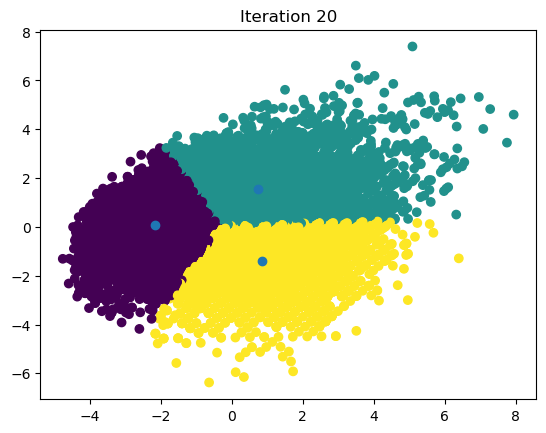

In [38]:
max_iterations = 100
centroid_count = 3

centroids = random_centroids(data, centroid_count)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids
    
    labels = get_labels(data, centroids)
    centroids = new_centroids(data, labels, centroid_count)
    plot_clusters(data, labels, centroids, iteration)
    iteration += 1

In [39]:
centroids

,0,1,2
overall,3.205672,5.807503,4.781960
potential,4.930905,6.497870,4.506813
wage_eur,1.028564,1.420500,1.118498
value_eur,1.026655,1.285685,1.044909
age,2.514741,3.598215,5.467648


In [40]:
from sklearn.cluster import KMeans

In [41]:
kmeans = KMeans(3)
kmeans.fit(data)

KMeans(n_clusters=3)

In [42]:
pd.DataFrame(kmeans.cluster_centers_, columns=features).T

,0,1,2
overall,6.221115,3.591174,4.806688
potential,6.623304,5.199519,4.509694
wage_eur,1.653443,1.039477,1.114016
value_eur,1.412287,1.035446,1.040280
age,4.123382,2.710564,5.609805
